In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from ViTRegressor import ViTRegressor
import TreeDataset
import torchvision.transforms.v2 as v2
from utils import channel_means_stds
from math import sqrt

if __name__ == "__main__":
    #usa una GPU se disponibile
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}") # 

    #Iperparametri
    num_epochs = 5
    batch_size = 30
    learning_rate = 1e-4
    loss_function = nn.MSELoss()
    params = {
    'num_channels': 11,
    'num_hidden_layers': 1, 
    'size_hidden_layers': [256],
    'dropout_rates': [0.5, 0.5]  
    }
    # Modello
    model = ViTRegressor(params['num_hidden_layers'], params['size_hidden_layers'], params['dropout_rates']).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Crea dataset
    train_set = TreeDataset.TreeDataset(mode='train')
    val_set = TreeDataset.TreeDataset(mode='val')
    test_set = TreeDataset.TreeDataset(mode='test')

    #calcolo medie e stds per canale del train_set
    train_means, train_stds = channel_means_stds(train_set)

    '''
    (0.485, 0.456, 0.406) imagenet means (red, green, blue)
    (0.229, 0.224, 0.225) imagenet std (rgb)
    sotto ho seguito lo schema dell'ordine delle bande nei tensori
    means = (0.406, 0.406, 0.456, 0.456, 0.456, 0.485, 0.456, 0.456, 0.456, 0.485, 0.456)
    stds = (0.225, 0.225, 0.224, 0.224, 0.224, 0.229, 0.224, 0.224, 0.224, 0.229, 0.224)
    '''

    #Data augmentation + train transforms
    train_transforms = v2.Compose([
                        v2.Resize((224, 224), antialias=True),
                        v2.RandomCrop(180),
                        v2.Resize((224, 224), antialias=True),
                        v2.RandomHorizontalFlip(),
                        v2.RandomVerticalFlip(),
                        #transforms.RandomApply([transforms.GaussianBlur(3, sigma=(0.1, 2.0))], p=0.5),
                        v2.ToTensor(),
                        v2.Normalize(train_means, train_stds)])

    #val/test normalization
    test_transforms = v2.Compose([
                        v2.Resize((224, 224), antialias=True),
                        v2.ToTensor(),
                        v2.Normalize(train_means, train_stds)])

ModuleNotFoundError: No module named 'ViTRegressor'

In [2]:
train_set = TreeDataset.TreeDataset(mode='train')
train_means, train_stds = channel_means_stds(train_set)
print(train_means)
print(train_stds)

[17715.6875, 16900.486328125, 19324.916015625, 18412.6015625, 33659.69140625, 16722.482421875, 20676.611328125, 30762.6875, 26453.736328125, 16695.986328125, 43.55046844482422]
[10419.953125, 10096.2568359375, 10045.6787109375, 9415.35546875, 8845.2705078125, 11132.8017578125, 10644.0224609375, 9388.4013671875, 9778.1474609375, 11603.029296875, 7.6262030601501465]


In [11]:
import pandas as pd
import rasterio as rio
data = pd.read_csv(r'C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\train_set.csv', header=0)

In [9]:
img_path = data['img_path'][0]
img_label = data[' SWP'][0]
print(img_path, img_label)

C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\DATASET\train\11_3 Zeuli 220623 Albero 32.tif 8.8


In [12]:
img = rio.open(img_path)
img_data = img.read()
img_tensor = torch.from_numpy(img_data)

In [16]:
img_tensor.shape

torch.Size([11, 224, 224])

In [17]:
img_tensor.dtype

torch.float32

In [29]:
train_transforms = v2.Compose([
                v2.Resize((224, 224), antialias=True),
                transforms.RandomApply([v2.RandomCrop(180)], p=1),
                v2.Resize((224, 224), antialias=True),
                v2.RandomHorizontalFlip(p=1),
                v2.RandomVerticalFlip(p=1),
                #transforms.RandomApply([transforms.GaussianBlur(3, sigma=(0.1, 2.0))], p=0.5),
                v2.ToTensor(),
                v2.Normalize(train_means, train_stds)])

new_img_tensor = train_transforms(img_tensor)

c:\Users\giova\OneDrive\Desktop\VS Code folders\env_prova\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [30]:
new_img_tensor.dtype

torch.float32

In [35]:
params = {
    'num_channels': 11,
    'num_hidden_layers': 1, 
    'size_hidden_layers': [256],
    'dropout_rates': [0.5]  
    }
# Modello
model = ViTRegressor(params['num_hidden_layers'], params['size_hidden_layers'], params['dropout_rates'])

In [41]:
for p in model.parameters():
  print(p.dtype)

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.

In [2]:
import joblib

In [7]:
study = joblib.load(r'C:\Users\giova\OneDrive\Desktop\projects\SWP-regr\optuna_results.pkl')
df = study.trials_dataframe()
df.sort_values('value').head(20)

,number,value,datetime_start,datetime_complete,duration,params_dropout_rates_0,params_dropout_rates_1,params_dropout_rates_2,params_dropout_rates_3,params_dropout_rates_4,...,params_neurons_per_layer_4,params_neurons_per_layer_5,params_neurons_per_layer_6,params_neurons_per_layer_7,params_neurons_per_layer_8,params_neurons_per_layer_9,params_num_hidden_layers,user_attrs_batch_size,user_attrs_n_epochs,state
417,417,7.463090,2024-05-09 02:22:23.219708,2024-05-09 02:23:29.174814,0 days 00:01:05.955106,0.373490,0.557378,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,5,500,COMPLETE
1820,1820,10.659382,2024-05-10 03:57:58.013850,2024-05-10 03:58:52.795791,0 days 00:00:54.781941,0.594085,0.504948,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,5,500,COMPLETE
1146,1146,11.432973,2024-05-09 17:27:03.783482,2024-05-09 17:27:58.326695,0 days 00:00:54.543213,0.548766,0.564343,0.728063,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,5,500,COMPLETE
482,482,12.017195,2024-05-09 03:28:56.445119,2024-05-09 03:29:56.493009,0 days 00:01:00.047890,0.426541,0.557086,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,5,500,COMPLETE
1392,1392,12.650881,2024-05-09 21:27:19.990757,2024-05-09 21:27:50.805636,0 days 00:00:30.814879,0.378439,0.495113,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,5,500,COMPLETE
390,390,13.085997,2024-05-09 02:00:32.712530,2024-05-09 02:01:22.815546,0 days 00:00:50.103016,0.464244,0.557958,0.448935,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,5,500,COMPLETE
1325,1325,14.024838,2024-05-09 20:21:22.790093,2024-05-09 20:22:19.196275,0 days 00:00:56.406182,0.447407,0.635112,0.234421,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,5,500,COMPLETE
399,399,14.482193,2024-05-09 02:05:44.869575,2024-05-09 02:06:15.764153,0 days 00:00:30.894578,0.383724,0.492117,0.288089,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,5,500,COMPLETE
755,755,16.198002,2024-05-09 10:59:45.363278,2024-05-09 11:00:38.720813,0 days 00:00:53.357535,0.345532,0.591869,0.586896,0.738326,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,5,500,COMPLETE
1237,1237,16.264519,2024-05-09 18:54:00.768036,2024-05-09 18:54:44.254685,0 days 00:00:43.486649,0.411130,0.588447,0.401186,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,5,500,COMPLETE


In [4]:
from math import sqrt
print(f"Best trial: {study.best_trial.number}")
print(f"    MSE: {study.best_trial.value}")
print(f"    RMSE: {sqrt(study.best_trial.value)}")
print(f"    params: {study.best_params}")

Best trial: 417
    MSE: 7.46308970451355
    RMSE: 2.7318656087943913
    params: {'num_hidden_layers': 2, 'neurons_per_layer_0': 519, 'neurons_per_layer_1': 948, 'learning_rate': 0.0005, 'dropout_rates_0': 0.37349024149018334, 'dropout_rates_1': 0.5573776200668319}


<Axes: >

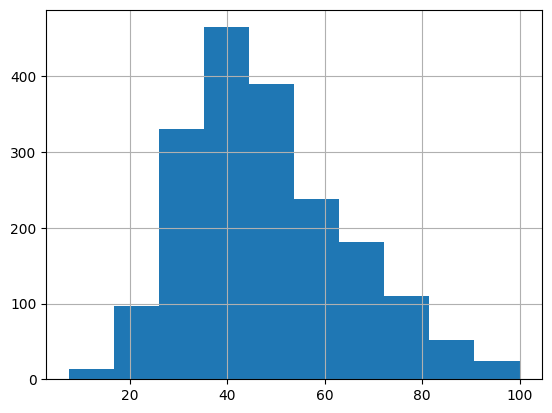

In [5]:
df.sort_values('value').head(1900)['value'].hist()